<a href="https://colab.research.google.com/github/NadhaIrshad/In22-S5-EN3150---Pattern-Recognition/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EN3150 Assignment 01

###  Learning from data and related challenges and linear models for regression

#  1. Linear regression impact on outliers

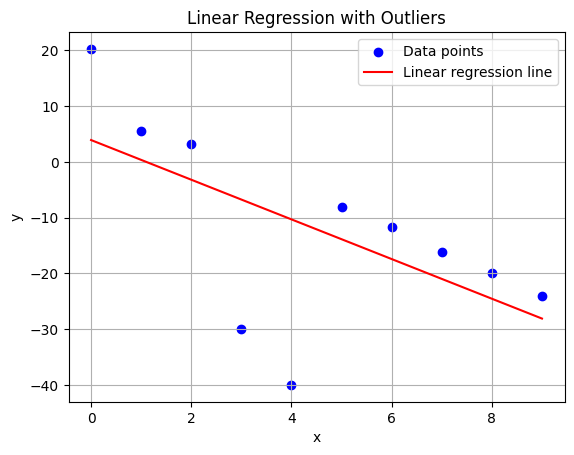

Regression Line: y = -3.56x + 3.92


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Define the data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1) # x must be 2D shape (n_samples, n_features)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Step 2: Train a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Step 3: Plot the data and regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Linear regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Print the regression line equation
print(f"Regression Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")


In [19]:
# Given data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_true = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Models
def model1(x): return -4 * x + 12
def model2(x): return -3.55 * x + 3.91

# Predictions
y_pred1 = model1(x)
y_pred2 = model2(x)

# Robust loss function
def robust_loss(y_true, y_pred, beta):
    residual_squared = (y_true - y_pred) ** 2
    loss = residual_squared / (residual_squared + beta**2)
    return np.mean(loss)

# Beta values to evaluate
betas = [1, 1e-6, 1e3]

# Calculate and print losses
print("Beta\t\tLoss (Model 1)\tLoss (Model 2)")
for beta in betas:
    loss1 = robust_loss(y_true, y_pred1, beta)
    loss2 = robust_loss(y_true, y_pred2, beta)
    print(f"{beta:.0e}\t\t{loss1:.6f}\t\t{loss2:.6f}")


Beta		Loss (Model 1)	Loss (Model 2)
1e+00		0.435416		0.972847
1e-06		1.000000		1.000000
1e+03		0.000227		0.000188


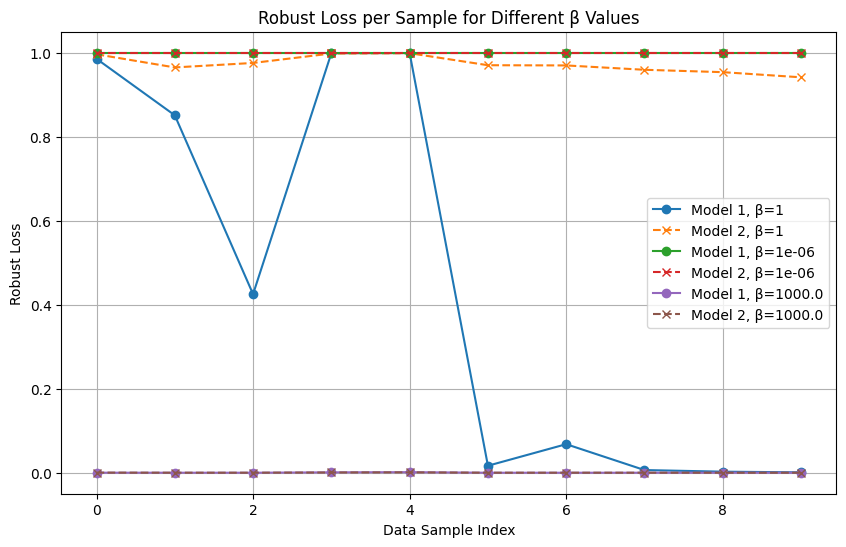

In [22]:
residuals1 = y_true - y_pred1
residuals2 = y_true - y_pred2

def robust_loss(residuals, beta):
    return (residuals**2) / (residuals**2 + beta**2)

plt.figure(figsize=(10, 6))

for beta in betas:
    loss1 = robust_loss(residuals1, beta)
    loss2 = robust_loss(residuals2, beta)
    plt.plot(range(len(residuals1)), loss1, 'o-', label=f'Model 1, β={beta}')
    plt.plot(range(len(residuals2)), loss2, 'x--', label=f'Model 2, β={beta}')

plt.xlabel("Data Sample Index")
plt.ylabel("Robust Loss")
plt.title("Robust Loss per Sample for Different β Values")
plt.grid(True)
plt.legend()
plt.show()

## Effect of Hyperparameter (β)

| \(β) | Loss (Model 1) | Loss (Model 2) | Interpretation |
|-----------|----------------|----------------|----------------|
| \(1e+00\) | 0.435416       | 0.972847       | Moderate β → proper balance between normal data and outliers.  |
| \(1e-06\)| 1.000000       | 1.000000       | Too small → all points are treated as outliers  |
| \(1e+03\)| 0.000227       | 0.000188       | Too large → all residuals are ignored  |

**Observation:**  
- **β = 1** gives meaningful loss values that reflect the actual model performance while mitigating outlier impact.  
- Extremely small β exaggerates residuals, while extremely large β ignores residuals entirely.

---

- The robust loss function reduces the influence of outliers while preserving the effect of normal residuals.  
- Selecting a **moderate β** is critical:  
  - **Small β** → everything is considered outlier  
  - **Large β** → everything is ignored  
  - **Moderate β (here β = 1)** → optimal trade-off between sensitivity to normal points and robustness to outliers  

Hence, **β = 1** is the suitable value for this dataset to mitigate the impact of outliers effectively.

## Model Selection Using the Robust Estimator

After analyzing the robust loss function:
we selected **β = 1** as the optimal hyperparameter to mitigate the impact of outliers while still considering the normal residuals.

---

#### Loss Values for β = 1

| Model    | Robust Loss (β = 1) |
|----------|--------------------|
| Model 1  | 0.435416           |
| Model 2  | 0.972847           |

**Observation:**  
- Model 1 has a **smaller robust loss** compared to Model 2.  
- Model 2’s higher loss indicates that its predictions deviate more from the true values for this dataset, even after accounting for outliers.

---

## Model Selection

**Most suitable model:** **Model 1**

**Justification:**  
1. **Lower robust loss:** The robust estimator confirms that Model 1 fits the majority of the data better.  
2. **Outlier mitigation:** Since robust loss reduces the effect of extreme residuals, the evaluation focuses on the overall trend rather than being dominated by outliers.  
3. **Consistency:** The model provides more reliable predictions across normal data points, making it preferable for practical use.  

**Conclusion:**  
Using the robust estimator with β = 1, **Model 1 is the most suitable model** for the provided dataset.


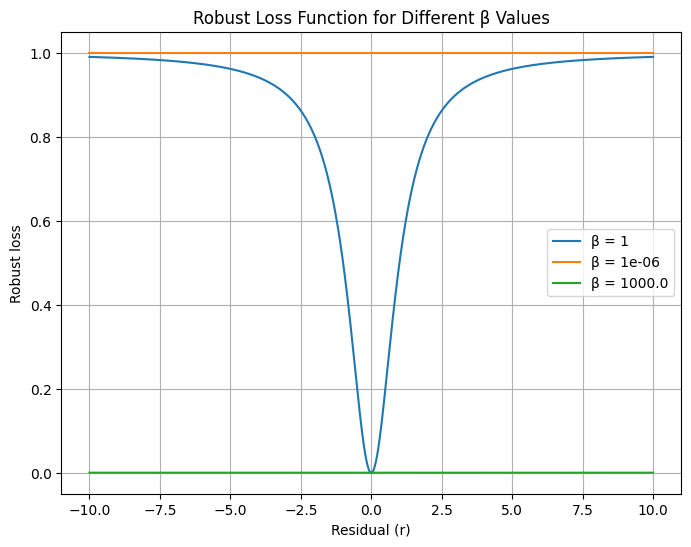

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Residual range
r = np.linspace(-10, 10, )

# Beta values to visualize
beta_values = [1, 1e-6, 1e3]

# Plot loss curves
plt.figure(figsize=(8, 6))
for beta in beta_values:
    loss = (r**2) / (r**2 + beta**2)
    plt.plot(r, loss, label=f"β = {beta}")

plt.xlabel("Residual (r)")
plt.ylabel("Robust loss")
plt.title("Robust Loss Function for Different β Values")
plt.grid(True)
plt.legend()
plt.show()


## How the Robust Estimator Reduces the Impact of Outliers

In standard linear regression, the ordinary least squares (OLS) loss is:

$
L_{\text{OLS}} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$

While effective for clean datasets, OLS is **highly sensitive to outliers**. Large residuals $(y_i - \hat{y})^2\$dominate the loss, causing the model to adjust excessively toward the outliers and reducing accuracy on the majority of data points.

---

### Robust Loss Function

To mitigate this, a robust estimator is introduced:

$
L(\theta, \beta) = \frac{1}{N} \sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2}
$

Where:  
- $y_i$ = true value  
- $\hat{y}_i$ = predicted value  
- $N$ = number of samples  
- $\beta$ = hyperparameter controlling robustness  

---

### Key Properties

#### 1. Bounded Loss

- Each residual term is **bounded between 0 and 1**.  
- As $(y_i - \hat{y}_i)^2 \to \infty$, the term approaches 1:

$
\frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2} \to 1
$

- This **naturally limits the influence of large outliers**, unlike OLS where large residuals can dominate.

---

#### 2. Smooth Transition Controlled by β

- **Small residuals** \((y_i - \hat{y}_i)^2 \ll \beta^2\):

$
\frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2} \approx \frac{(y_i - \hat{y}_i)^2}{\beta^2}
$

- Loss behaves **approximately quadratic**, similar to OLS.  

- **Large residuals** $(y_i - \hat{y}_i)^2 \gg \beta^2$:

$
\frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2} \approx 1
$

- Loss **approaches a constant**, preventing outliers from dominating.

---

#### 3. Robustness Mechanism

- The denominator $(y_i - \hat{y}_i)^2 + \beta^2$ ensures:

  1. **Large residuals do not dominate** the loss function.  
  2. **Gradients with respect to parameters diminish** for outliers.  
  3. The optimization process becomes **less sensitive to extreme values**, allowing the model to focus on the majority of the data.  

---

#### Conclusion

The robust estimator effectively reduces the impact of outliers by:

1. **Bounding the loss** between 0 and 1 for each residual.  
2. Providing a **smooth transition** from quadratic behavior for small residuals to constant behavior for large residuals, controlled by β.  
3. Ensuring that **extreme values do not dominate optimization**, resulting in more stable and reliable model performance.  

Choosing an appropriate **moderate β** (like β = 1) allows the model to balance sensitivity to normal points while down-weighting outliers effectively.


## RANSAC regression
- RANSAC is an iterative method to **fit a model while ignoring outliers**.  
- Instead of minimizing a traditional loss for all data points, RANSAC:

  1. Randomly selects a **subset of data points**.  
  2. Fits the model to this subset.  
  3. Determines which points are **inliers** (fit the model well within a threshold).  
  4. Repeats the process multiple times and selects the model with the **most inliers**.

- **Loss function perspective:** RANSAC uses a **threshold-based loss**, where:

$
L_{\text{RANSAC}}(y_i, \hat{y}_i) =
\begin{cases}
0, & \text{if } |y_i - \hat{y}_i| \leq \text{threshold} \ (\text{inlier}) \\
1, & \text{if } |y_i - \hat{y}_i| > \text{threshold} \ (\text{outlier})
\end{cases}
$

- Only the **inliers contribute to model fitting**, making it robust to large outliers.

#### Advantages of RANSAC

1. **Outlier rejection:** Extreme values are ignored during model estimation.  
2. **Simple thresholding:** No need to tune a smooth hyperparameter like β.  
3. **Widely used in practice:** Common in computer vision, robotics, and regression problems with noisy data.


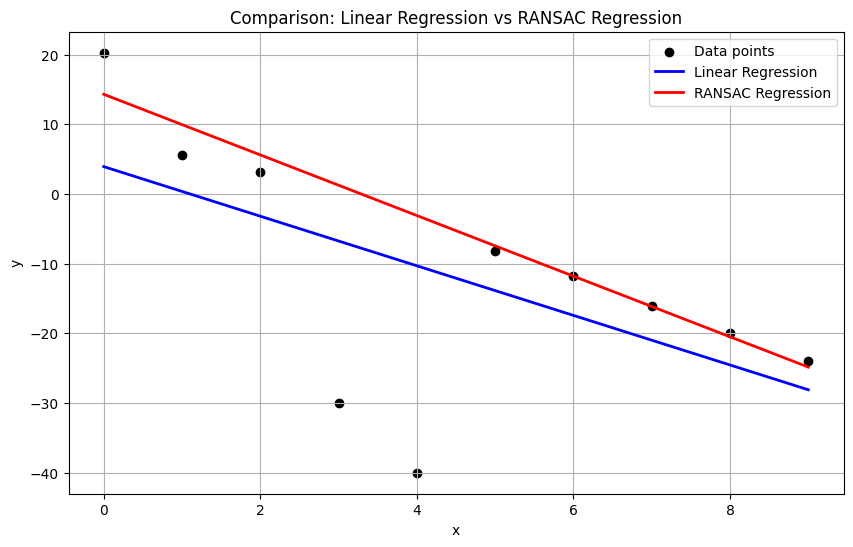

Linear Regression: slope = -3.56, intercept = 3.92
RANSAC Regression: slope = -4.35, intercept = 14.29


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor

# Standard Linear Regression

lr = LinearRegression()
lr.fit(x, y_true)
y_pred_lr = lr.predict(x)


# RANSAC Regression
ransac = RANSACRegressor(LinearRegression(), min_samples=5, residual_threshold=10, random_state=42)
ransac.fit(x, y_true)
y_pred_ransac = ransac.predict(x)


# Plot results
plt.figure(figsize=(10,6))
plt.scatter(x, y_true, color='black', label='Data points')
plt.plot(x, y_pred_lr, color='blue', linewidth=2, label='Linear Regression')
plt.plot(x, y_pred_ransac, color='red', linewidth=2, label='RANSAC Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison: Linear Regression vs RANSAC Regression')
plt.legend()
plt.grid(True)
plt.show()

print("Linear Regression: slope = {:.2f}, intercept = {:.2f}".format(lr.coef_[0], lr.intercept_))
print("RANSAC Regression: slope = {:.2f}, intercept = {:.2f}".format(ransac.estimator_.coef_[0], ransac.estimator_.intercept_))


# 2. Loss Function

In [1]:
import numpy as np

# True label
y_true = 1

# Predictions
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                   0.6, 0.7, 0.8, 0.9, 1.0])

# Calculate MSE
mse = (y_true - y_pred)**2 # for a single sample

# Calculate BCE
# Add a small epsilon to avoid log(0)
epsilon = 1e-15
bce = - (y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Print results
print("Prediction\tMSE\t\tBCE")
for pred, m, b in zip(y_pred, mse, bce):
    print(f"{pred:.3f}\t\t{m:.4f}\t\t{b:.4f}")


Prediction	MSE		BCE
0.005		0.9900		5.2983
0.010		0.9801		4.6052
0.050		0.9025		2.9957
0.100		0.8100		2.3026
0.200		0.6400		1.6094
0.300		0.4900		1.2040
0.400		0.3600		0.9163
0.500		0.2500		0.6931
0.600		0.1600		0.5108
0.700		0.0900		0.3567
0.800		0.0400		0.2231
0.900		0.0100		0.1054
1.000		0.0000		-0.0000


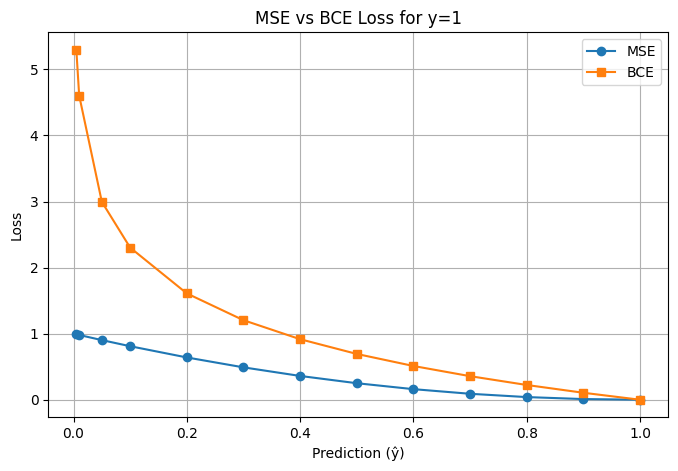

In [3]:
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred, mse, marker='o', label='MSE')
plt.plot(y_pred, bce, marker='s', label='BCE')
plt.xlabel("Prediction (ŷ)")
plt.ylabel("Loss")
plt.title("MSE vs BCE Loss for y=1")
plt.legend()
plt.grid(True)
plt.show()

MSE: Quadratic decrease from 1 to 0 as
y
^ goes from 0 to 1. The gradient is small when prediction is wrong.

BCE: Starts at infinity (for
y
^
=
0), decreases sharply, and approaches 0 as
y
^ approaches 1, larger gradient.

## Comparison of Loss Functions: MSE vs BCE

### Application 1: Linear Regression with Continuous Output

The goal of **linear regression** is to predict **continuous values**.  

The **Mean Squared Error (MSE)** measures the average squared difference between the predicted values $\hat{y}_i$ and the actual values $y_i$:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

#### Reasons for Using MSE:
- **Convex and differentiable:** The MSE function is smooth and convex with respect to the model parameters, making optimization straightforward.  
- **Penalizes larger errors more strongly:** Squaring the errors gives more weight to predictions that are far from the true values.  
- **Statistical justification:** Minimizing MSE is equivalent to **maximum likelihood estimation** under the assumption of Gaussian-distributed errors.  

 Using Binary Cross-Entropy (BCE) here would be inappropriate because BCE assumes a probability target between 0 and 1, while the actual variable in linear regression is continuous.

---

### Application 2: Logistic Regression with Binary Output

For **logistic regression**, the dependent variable is **binary**: $y$ in $\{0,1\}$.  

The model outputs probabilities using the **sigmoid function**:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

The recommended loss is **Binary Cross-Entropy (BCE)**:

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
$$

####  Reasons for Using BCE:
- **Derived from maximum likelihood estimation** for Bernoulli-distributed targets.  
- **Well-behaved gradients:** Even when predictions are near 0 or 1, the gradients remain strong, allowing faster and stable learning.  
- **MSE is unstable for classification:** Using MSE can result in vanishing gradients when predictions are confident but wrong, slowing convergence.

# 3. Data PreProcessing

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt

your_index_no = 220409
signal_length = 100
num_nonzero = 10

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Feature 1
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10
sparse_signal = sparse_signal / 5

# Feature 2
epsilon = np.random.normal(0, 15, signal_length)



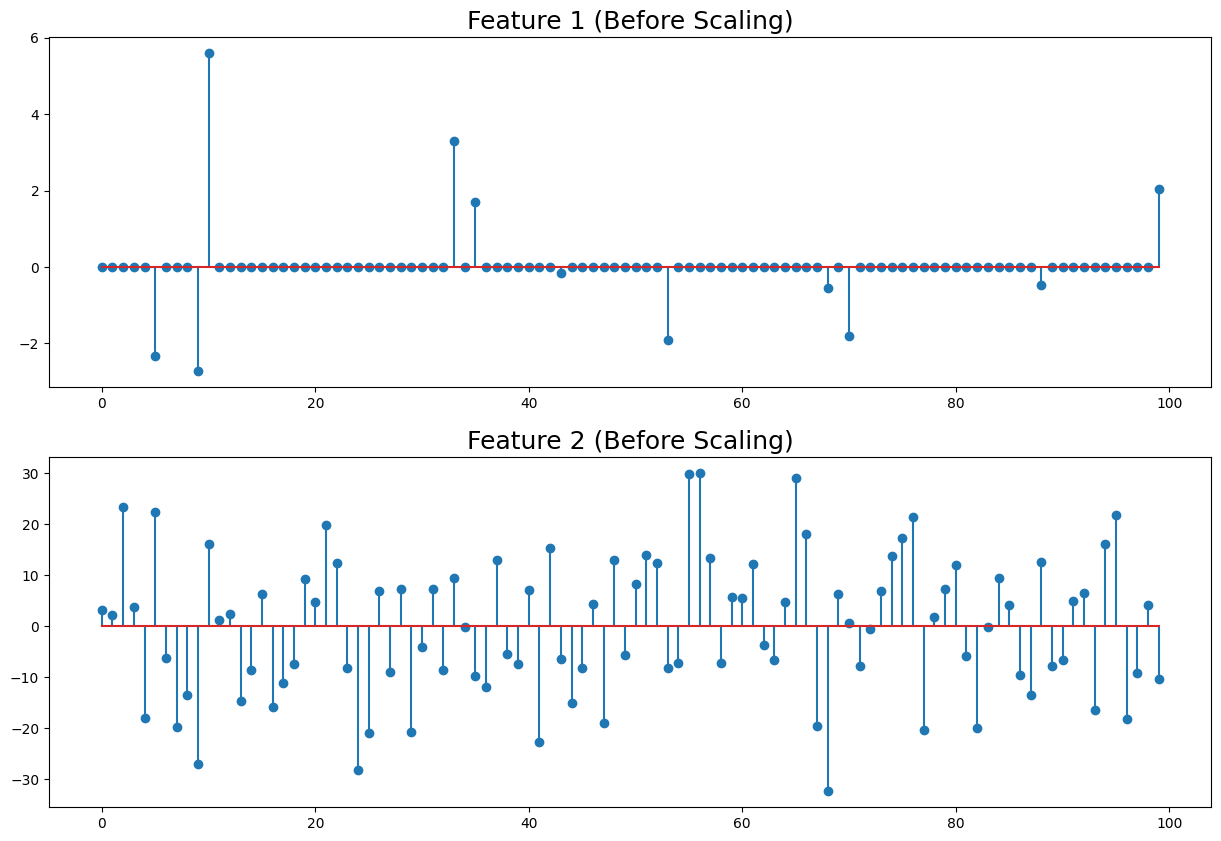

In [2]:
# Features before scaling
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("Feature 1 (Before Scaling)", fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2,1,2)
plt.title("Feature 2 (Before Scaling)", fontsize=18)
plt.stem(epsilon)
plt.show()

In [2]:
features = {
    "Sparse Signal": sparse_signal,
    "Epsilon": epsilon
}

# 2. Descriptive stats

print("Feature Analysis:\n")
for name, data in features.items():
    print(f"{name}:")
    print(f"  Mean: {np.mean(data):.4f}")
    print(f"  Median: {np.median(data):.4f}")
    print(f"  Std: {np.std(data):.4f}")
    print(f"  Min: {np.min(data):.4f}")
    print(f"  Max: {np.max(data):.4f}")
    print(f"  Zeros: {np.sum(data == 0)} / {len(data)} ({np.sum(data==0)/len(data)*100:.1f}%)\n")


Feature Analysis:

Sparse Signal:
  Mean: 0.0221
  Median: 0.0000
  Std: 0.9103
  Min: -2.9229
  Max: 5.6000
  Zeros: 89 / 100 (89.0%)

Epsilon:
  Mean: 1.6854
  Median: 3.5306
  Std: 14.0391
  Min: -32.5723
  Max: 33.1531
  Zeros: 0 / 100 (0.0%)



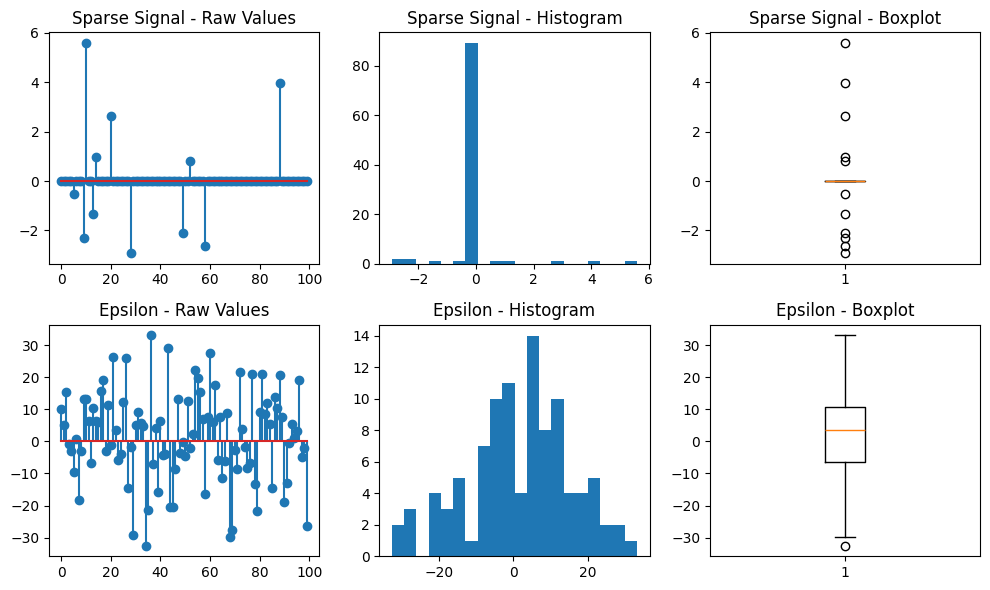

In [4]:
fig, axes = plt.subplots(len(features), 3, figsize=(10, 6))

for i, (name, data) in enumerate(features.items()):
    axes[i, 0].stem(data)
    axes[i, 0].set_title(f"{name} - Raw Values")

    axes[i, 1].hist(data, bins=20)
    axes[i, 1].set_title(f"{name} - Histogram")

    axes[i, 2].boxplot(data)
    axes[i, 2].set_title(f"{name} - Boxplot")

plt.tight_layout()
plt.show()

### Scaling Methods

### 1. Min-Max Scaling (Normalization)
- **Description:** Transforms features to a fixed range, typically [0, 1], by subtracting the minimum value and dividing by the range (max - min).  
- **Effect on Data:** Preserves the shape of the original distribution but compresses all values into the chosen range.  
- **Best for:** Algorithms sensitive to magnitude differences (e.g., KNN, Neural Networks) and when the data has no extreme outliers.  

---

### 2. Standardization (Z-score Scaling)
- **Description:** Centers the data by subtracting the mean and scales it by the standard deviation, producing features with mean 0 and standard deviation 1.  
- **Effect on Data:** Distributions are shifted and rescaled but keep their original shape; outliers remain present.  
- **Best for:** Algorithms assuming normally distributed data (e.g., Linear Regression, Logistic Regression, SVM).  

---

### 3. MaxAbs Scaling
- **Description:** Scales each feature by its maximum absolute value, transforming the data to be in the range [-1, 1].  
- **Effect on Data:** Preserves sparsity and sign of data while adjusting magnitude.  
- **Best for:** Sparse data (many zeros) where preserving zero entries is important.  

#### Feature 1

- **Raw values:** Most values are zero with occasional spikes at discrete positive integers. This pattern suggests that Feature 1 is sparse and event-driven (many observations have no occurrence, and when they do, they occur in whole-number counts).  
- **Histogram:** Shows a high concentration at 0, with small bars at higher integer values (e.g., 2, 4, 6, 8). The distribution is highly skewed to the right (positive skew).  
- **Box plot:** The median is close to 0, with several outliers on the higher end. This confirms the sparse nature and skewed distribution.  

 **Max-abs sclaing** is choosen as it preserves its sparsity while keeping structure of rare non-zero events.
---

#### Feature 2

- **Raw values:** Values are spread across a wide positive and negative range, with no concentration at zero This indicates a relatively stable and continuous measurement.  
- **Histogram:** Displays a roughly bell-shaped distribution centered near 0.9, suggesting an approximately normal distribution with low variance.  
- **Box plot:** The median is around 0.5, with the interquartile range narrow, and no significant outliers, indicating consistency across observations.

 **Standard scaling** normalizes it to mean 0, std 1 without changing the structure of the distribution.


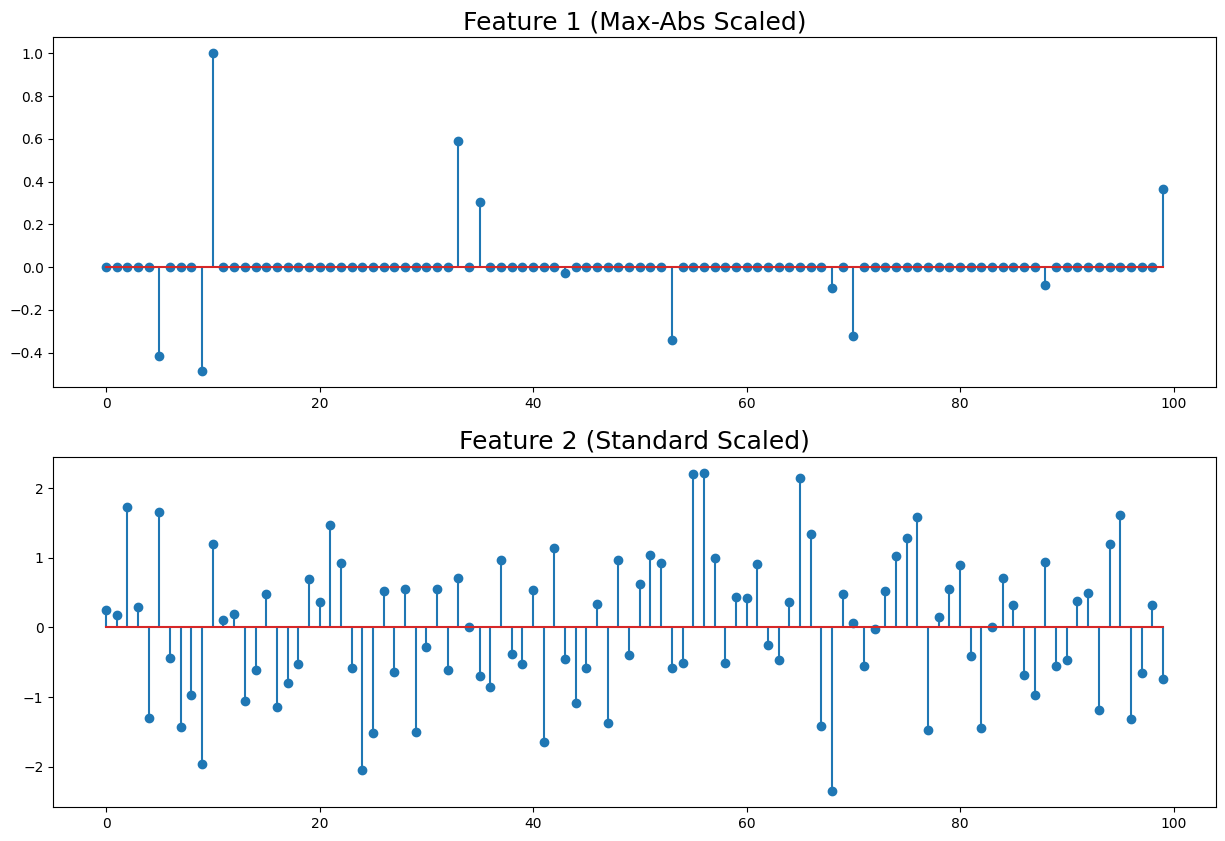

In [11]:
# Scaling
scaler_f1 = MaxAbsScaler()
feature1_scaled = scaler_f1.fit_transform(sparse_signal.reshape(-1,1))

scaler_f2 = StandardScaler()
feature2_scaled = scaler_f2.fit_transform(epsilon.reshape(-1,1))

# Plot scaled features
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("Feature 1 (Max-Abs Scaled)", fontsize=18)
plt.stem(feature1_scaled)
plt.subplot(2,1,2)
plt.title("Feature 2 (Standard Scaled)", fontsize=18)
plt.stem(feature2_scaled)
plt.show()